In [1]:
# Include Libraries
# make necessary imports

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import seaborn as sb
import itertools
import pickle
import re
import string

In [2]:
# importing dataset using pandas dataframe
# read the data
# reading data files

dataFile = pd.read_csv("D:\\4th Year\\CSE445\\Project\\news\\news.csv")

In [3]:
# data observation
# get shape and head
# inspect shape of df
dataFile.shape

(6335, 4)

In [4]:
dataFile.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


<AxesSubplot:xlabel='label', ylabel='count'>

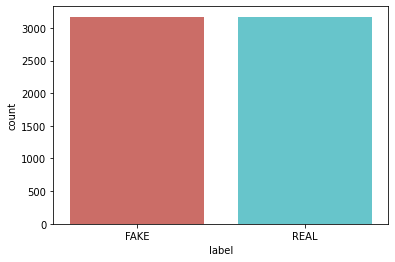

In [5]:
# distribution of classes for prediction

def create_distribution(df):
    return sb.countplot(x='label', data=df, palette='hls')

# by calling below we can see that training, testing and valid data seems to be failry evenly distributed between the classes
create_distribution(dataFile)

In [6]:
# data integrity check (missing label values)
# the dataset does not contains missing values therefore no cleaning required

def data_qualityCheck():
    print("Checking data quality....")
    dataFile.isnull().sum()
    dataFile.info()
    print("check finished.")

data_qualityCheck()

Checking data quality....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
check finished.


In [7]:
# to remove the special characters
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [8]:
dataFile["text"] = dataFile["text"].apply(word_drop)

In [9]:
# separate the labels and the set up training and test datasets

# get the labels
y = dataFile.label
y.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
# drop the label column

dataFile.drop("label", axis=1)

,Unnamed: 0,title,text
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fello...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,u s secretary of state john f kerry said mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the le...
4,875,The Battle of New York: Why This Primary Matters,it s primary day in new york and front runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,the state department told the republican natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the p in pbs should stand for plutocratic ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,anti trump protesters are tools of the oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia president obama convene...


In [11]:
# make training and test sets

# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(dataFile['text'], y, test_size=0.33, random_state=53)

In [12]:
X_train.head(10)

2576                                                     
1539    report copyright violation do you think there ...
5163    the election in  photos   numbers and  quotes ...
2615    email ever wonder what s on the mind of today ...
4270    wells fargo is rotting from the top down wells...
2841    donald trump may have eased some republican fe...
1387    trump rape accuser skips press conference  cit...
5760    as harris lay struggling and dying  he told th...
1605     cnn  a pair of dramatic raids friday in franc...
1644    food mixology  when eaten together  these food...
Name: text, dtype: object

In [13]:
X_test.head(10)

4221    donald trump threatened to sue the new york ti...
1685    planned parenthood  abortion pill usage now ri...
3348    in a last dash  final  hail mary  attempt to e...
2633    washington  cnn  donald trump and ben carson n...
975     the obama administration announced friday it w...
2235      three local military veterans to receive rec...
548     home this month popular what the trump skeptic...
1367    but then the sobering realization sets in  the...
5908    killing obama administration rules  dismantlin...
636     the party looks to kamala harris  catherine co...
Name: text, dtype: object

In [14]:
# before we can train an algorithm to classify fake news labels, we need to extract features from it. it means reducing the mass 
# of unstructured data into some uniform set of attributes that an algorithm can understand. for fake news detection, it could 
# be word counts (bag of words)

# we will start with simple bag of words technique
# building the count Tfidf Vectors
# creating features vector - document term matrix
# initialize the 'count)vectorizer'
count_vectorizer = CountVectorizer(stop_words='english')

In [15]:
# Fit and transform the training data
# Learn the vocabulary dictionary and return term-document matrix
count_train = count_vectorizer.fit_transform(X_train)

In [16]:
print(count_vectorizer)

CountVectorizer(stop_words='english')


In [17]:
print(count_train)

  (1, 40134)	1
  (1, 10188)	1
  (1, 51716)	1
  (1, 48226)	1
  (1, 13972)	2
  (1, 42154)	2
  (1, 49479)	2
  (1, 33518)	4
  (1, 33006)	1
  (1, 19831)	1
  (1, 40198)	1
  (1, 6511)	1
  (1, 27372)	2
  (1, 13975)	2
  (1, 23589)	1
  (1, 46818)	2
  (1, 14837)	1
  (1, 33821)	1
  (1, 19519)	1
  (1, 23587)	1
  (1, 36519)	1
  (1, 45129)	1
  (1, 34551)	1
  (2, 14989)	1
  (2, 35852)	1
  :	:
  (4243, 39754)	1
  (4243, 39099)	1
  (4243, 51158)	1
  (4243, 16999)	1
  (4243, 9500)	1
  (4243, 36530)	1
  (4243, 5660)	1
  (4243, 20373)	1
  (4243, 51547)	1
  (4243, 5234)	1
  (4243, 3081)	1
  (4243, 37192)	1
  (4243, 47662)	1
  (4243, 36545)	1
  (4243, 18679)	1
  (4243, 39803)	1
  (4243, 15261)	1
  (4243, 47661)	1
  (4243, 52744)	1
  (4243, 27100)	1
  (4243, 47047)	1
  (4243, 9342)	1
  (4243, 50509)	1
  (4243, 18880)	1
  (4243, 6076)	1


In [18]:
def get_countVectorizer_states():
    print(count_train.shape)
    print(count_vectorizer.vocabulary_)

get_countVectorizer_states()

(4244, 54381)
{'report': 40134, 'copyright': 10188, 'violation': 51716, 'think': 48226, 'doom': 13972, 'sayers': 42154, 'trump': 49479, 'office': 33518, 'notice': 33006, 'glp': 19831, 'republican': 40198, 'bush': 6511, 'left': 27372, 'doomsaying': 13975, 'increases': 23589, 'sure': 46818, 'effect': 14837, 'opposite': 33821, 'gets': 19519, 'increase': 23587, 'political': 36519, 'spectrum': 45129, 'page': 34551, 'election': 14989, 'photos': 35852, 'numbers': 33152, 'quotes': 38472, 'candidates': 6883, 'center': 7543, 'email': 15153, 'wonder': 53129, 'mind': 30522, 'today': 48638, 'notable': 32986, 'people': 35408, 'don': 13916, 'miss': 30776, 'unbelievable': 50000, 'roundup': 41329, 'best': 4620, 'talked': 47381, 'day': 11584, 'course': 10505, 'schindler': 42324, 'list': 27944, 'saddest': 41676, 'movies': 31474, 'time': 48500, 'going': 19930, 'brag': 5774, 'chance': 7712, 'liam': 27653, 'neeson': 32253, 'humility': 22693, 'microwave': 30339, 'like': 27791, 'whisper': 52679, 'sending': 42

In [19]:
# transform the test set
count_test = count_vectorizer.transform(X_test)

In [20]:
# create tf-df frequency features
# tf-idf
# initialize a TfidfVectorizer
# initialize the tfidf_vectorizer
# this removes words which appear in more than 70% of the articles
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [21]:
# fit and tranform train set, transform test set
# fit and tranfoem the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [22]:
def get_tfidf_stats():
    tfidf_train.shape
    # get train data feature names
    print(tfidf_train.A[:10])
    
get_tfidf_stats()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
tfidf_test = tfidf_vectorizer.transform(X_test)

In [24]:
print(tfidf_vectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [25]:
print(count_vectorizer.get_feature_names()[:10])

['aa', 'aaa', 'aaas', 'aab', 'aadmi', 'aahing', 'aaib', 'aalia', 'aam', 'aamaq']


In [26]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
difference =  set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [27]:
print(count_df.equals(tfidf_df))

False


In [28]:
print(count_df.head())

   aa  aaa  aaas  aab  aadmi  aahing  aaib  aalia  aam  aamaq  ...  حلب  عربي  \
0   0    0     0    0      0       0     0      0    0      0  ...    0     0   
1   0    0     0    0      0       0     0      0    0      0  ...    0     0   
2   0    0     0    0      0       0     0      0    0      0  ...    0     0   
3   0    0     0    0      0       0     0      0    0      0  ...    0     0   
4   0    0     0    0      0       0     0      0    0      0  ...    0     0   

   عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0   0   0   0        0   0    0        0      0  
1   0   0   0        0   0    0        0      0  
2   0   0   0        0   0    0        0      0  
3   0   0   0        0   0    0        0      0  
4   0   0   0        0   0    0        0      0  

[5 rows x 54381 columns]


In [29]:
print(tfidf_df.head())

    aa  aaa  aaas  aab  aadmi  aahing  aaib  aalia  aam  aamaq  ...  حلب  \
0  0.0  0.0   0.0  0.0    0.0     0.0   0.0    0.0  0.0    0.0  ...  0.0   
1  0.0  0.0   0.0  0.0    0.0     0.0   0.0    0.0  0.0    0.0  ...  0.0   
2  0.0  0.0   0.0  0.0    0.0     0.0   0.0    0.0  0.0    0.0  ...  0.0   
3  0.0  0.0   0.0  0.0    0.0     0.0   0.0    0.0  0.0    0.0  ...  0.0   
4  0.0  0.0   0.0  0.0    0.0     0.0   0.0    0.0  0.0    0.0  ...  0.0   

   عربي   عن   لم   ما  محاولات   من  هذا  والمرضى  ยงade  
0   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
1   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
2   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
3   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  
4   0.0  0.0  0.0  0.0      0.0  0.0  0.0      0.0    0.0  

[5 rows x 54381 columns]


In [30]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes,  rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Naive Bayes

In [31]:
# building classifier using naive bayes
# native bayes classifier for Multinomail model
nb_pipeline = Pipeline([('NBTV', tfidf_vectorizer), ('nb_clf', MultinomialNB())])

In [32]:
# fit naive bayes classifier according to x, y
nb_pipeline.fit(X_train,Y_train)

Pipeline(steps=[('NBTV', TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [33]:
# classification on an array of test vectors X
predicted_nbt = nb_pipeline.predict(X_test)

In [34]:
score = metrics.accuracy_score(Y_test, predicted_nbt)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.56%


Confusion matrix, without normalization


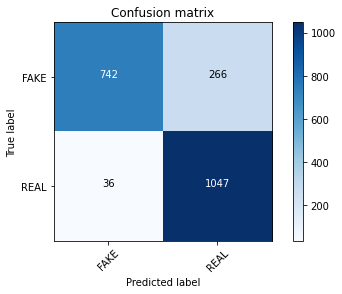

In [35]:
cm = metrics.confusion_matrix(Y_test, predicted_nbt, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [36]:
print(cm)

[[ 742  266]
 [  36 1047]]


In [37]:
nbc_pipeline = Pipeline([
        ('NBCV', count_vectorizer),
        ('nb_clf', MultinomialNB())
    ])
nbc_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('NBCV', CountVectorizer(stop_words='english')),
                ('nb_clf', MultinomialNB())])

In [38]:
predicted_nbc = nbc_pipeline.predict(X_test)
score = metrics.accuracy_score(Y_test, predicted_nbc)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.0%


Confusion matrix, without normalization


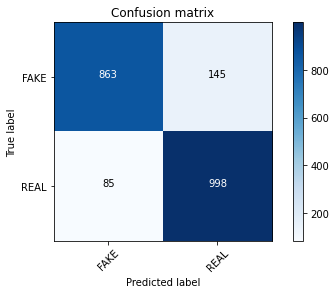

In [39]:
cm1 = metrics.confusion_matrix(Y_test, predicted_nbc, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [40]:
print(cm1)

[[863 145]
 [ 85 998]]


In [41]:
print(metrics.classification_report(Y_test, predicted_nbt))

              precision    recall  f1-score   support

        FAKE       0.95      0.74      0.83      1008
        REAL       0.80      0.97      0.87      1083

    accuracy                           0.86      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.87      0.86      0.85      2091



In [42]:
print(metrics.classification_report(Y_test, predicted_nbc))

              precision    recall  f1-score   support

        FAKE       0.91      0.86      0.88      1008
        REAL       0.87      0.92      0.90      1083

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
# using tfidf vecorizer

LR = LogisticRegression()
LR.fit(tfidf_train, Y_train)

LogisticRegression()

In [45]:
score = LR.score(tfidf_test, Y_test)

In [46]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.15%


In [47]:
pred_LR = LR.predict(tfidf_test)

Confusion matrix, without normalization


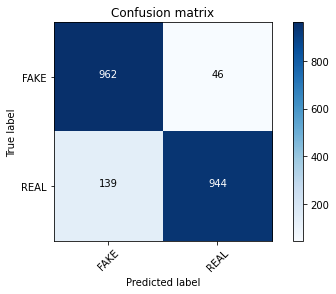

In [48]:
cm = metrics.confusion_matrix(Y_test, pred_LR, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [49]:
print(cm)

[[962  46]
 [139 944]]


In [50]:
# using count vectorizer

LR_count = LogisticRegression()
LR_count.fit(count_train, Y_train)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
score = LR_count.score(count_test, Y_test)

In [52]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 91.1%


In [53]:
pred_LR_count = LR_count.predict(count_test)

Confusion matrix, without normalization


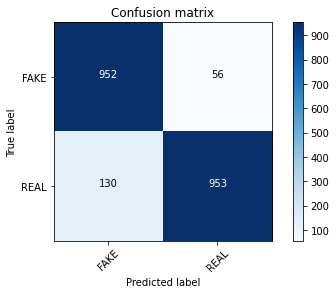

In [54]:
cm2 = metrics.confusion_matrix(Y_test, pred_LR_count, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm2, classes=['FAKE', 'REAL'])

In [55]:
print(cm2)

[[952  56]
 [130 953]]


In [56]:
# using tfidf vecorizer 

print(classification_report(Y_test, pred_LR))

              precision    recall  f1-score   support

        FAKE       0.87      0.95      0.91      1008
        REAL       0.95      0.87      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.92      0.91      0.91      2091



In [57]:
# using count vecorizer 

print(classification_report(Y_test, pred_LR_count))

              precision    recall  f1-score   support

        FAKE       0.88      0.94      0.91      1008
        REAL       0.94      0.88      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.91      0.91      0.91      2091
weighted avg       0.91      0.91      0.91      2091



# Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtc = DecisionTreeClassifier()
dtc.fit(tfidf_train, Y_train)

DecisionTreeClassifier()

In [60]:
score = dtc.score(tfidf_test, Y_test)

In [61]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.92%


In [62]:
dtc_pred = dtc.predict(tfidf_test)

Confusion matrix, without normalization


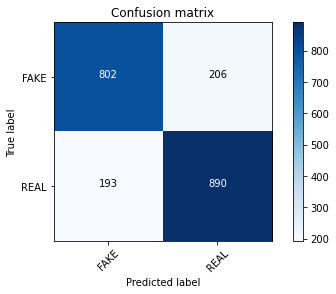

In [63]:
cm = metrics.confusion_matrix(Y_test, dtc_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [64]:
print(cm)

[[802 206]
 [193 890]]


In [65]:
# using count vectorizer

dtc_count = DecisionTreeClassifier()
dtc_count.fit(count_train, Y_train)

DecisionTreeClassifier()

In [66]:
score = dtc_count.score(count_test, Y_test)

In [67]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 81.35%


In [68]:
dtc_pred_count = dtc_count.predict(count_test)

Confusion matrix, without normalization


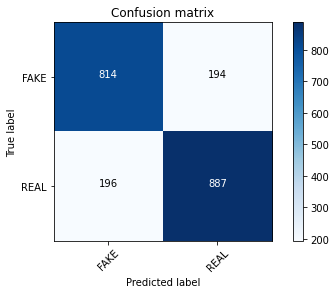

In [69]:
cm3 = metrics.confusion_matrix(Y_test, dtc_pred_count, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm3, classes=['FAKE', 'REAL'])

In [70]:
print(cm3)

[[814 194]
 [196 887]]


In [71]:
# using tfidf vectorizer

print(classification_report(Y_test, dtc_pred))

              precision    recall  f1-score   support

        FAKE       0.81      0.80      0.80      1008
        REAL       0.81      0.82      0.82      1083

    accuracy                           0.81      2091
   macro avg       0.81      0.81      0.81      2091
weighted avg       0.81      0.81      0.81      2091



In [72]:
# using count vectorizer

print(classification_report(Y_test, dtc_pred_count))

              precision    recall  f1-score   support

        FAKE       0.81      0.81      0.81      1008
        REAL       0.82      0.82      0.82      1083

    accuracy                           0.81      2091
   macro avg       0.81      0.81      0.81      2091
weighted avg       0.81      0.81      0.81      2091



# Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(tfidf_train, Y_train)

RandomForestClassifier(random_state=0)

In [75]:
score = rfc.score(tfidf_test, Y_test)

In [76]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 90.1%


In [77]:
rfc_pred = rfc.predict(tfidf_test)

Confusion matrix, without normalization


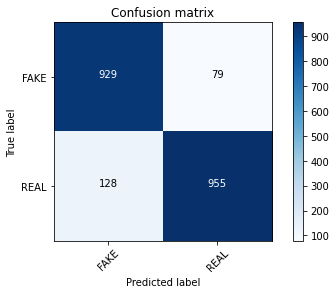

In [78]:
cm = metrics.confusion_matrix(Y_test, rfc_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [79]:
print(cm)

[[929  79]
 [128 955]]


In [80]:
# using count vectorizer

rfc_count = RandomForestClassifier(random_state=0)
rfc_count.fit(count_train, Y_train)

RandomForestClassifier(random_state=0)

In [81]:
score = rfc_count.score(count_test, Y_test)

In [82]:
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 89.48%


In [83]:
rfc_pred_count = rfc_count.predict(count_test)

Confusion matrix, without normalization


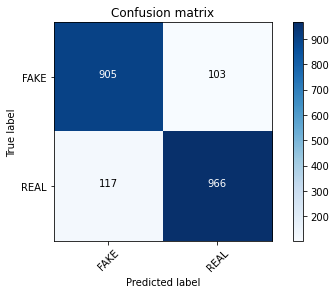

In [84]:
cm4 = metrics.confusion_matrix(Y_test, rfc_pred_count, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm4, classes=['FAKE', 'REAL'])

In [85]:
print(cm4)

[[905 103]
 [117 966]]


In [86]:
# using tfidf vectorizer

print(classification_report(Y_test, rfc_pred))

              precision    recall  f1-score   support

        FAKE       0.88      0.92      0.90      1008
        REAL       0.92      0.88      0.90      1083

    accuracy                           0.90      2091
   macro avg       0.90      0.90      0.90      2091
weighted avg       0.90      0.90      0.90      2091



In [87]:
# using count vectorizer

print(classification_report(Y_test, rfc_pred_count))

              precision    recall  f1-score   support

        FAKE       0.89      0.90      0.89      1008
        REAL       0.90      0.89      0.90      1083

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091



# Manual Testing

In [88]:
def output_label(n):
    if n == 'FAKE':
        return "Fake news"
    elif n == 'REAL':
        return "Real news"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_dataFile_test = pd.DataFrame(testing_news)
    new_dataFile_test["text"] = new_dataFile_test["text"].apply(word_drop)
    new_x_test = new_dataFile_test["text"]
    
    # tfidf vectorizer 
    new_tfidf_test = tfidf_vectorizer.transform(new_x_test)
    predicted_nbt = nb_pipeline.predict(new_x_test)
    pred_LR = LR.predict(new_tfidf_test)
    dtc_pred = dtc.predict(new_tfidf_test)
    rfc_pred = rfc.predict(new_tfidf_test)
    
    # count vectorizer
    new_count_test = count_vectorizer.transform(new_x_test)
    predicted_nbc = nbc_pipeline.predict(new_x_test)
    pred_LR_count = LR_count.predict(new_count_test)
    dtc_pred_count = dtc_count.predict(new_count_test)
    rfc_pred_count = rfc_count.predict(new_count_test)
    
    return print("\n\n\nUsing tfidf vectorizer: \n\nNaive Bayes prediction: {} \nLogistic Regression prediction: {} \nDicission Tree prediction: {} \nRandom Forest Classifier prefiction: {} \n\n\n\nUsing count vectorizer: \n\nNaive Bayes prediction: {} \nLogistic Regression prediction: {} \nDicission Tree prediction: {} \nRandom Forest Classifier prefiction: {} ".format(output_label(predicted_nbt),
                                                                                         output_label(pred_LR),
                                                                                         output_label(dtc_pred),
                                                                                         output_label(rfc_pred),
                                                                                         output_label(predicted_nbc),
                                                                                         output_label(pred_LR_count),
                                                                                         output_label(dtc_pred_count),
                                                                                         output_label(rfc_pred_count)
                                                                                         ))

In [89]:
news = str(input())
manual_testing(news)

Hillary Clinton and Donald Trump made some inaccurate claims during an NBC â€œcommander-in-chiefâ€ forum on military and veterans issues:  â€¢ Clinton wrongly claimed Trump supported the war in Iraq after it started, while Trump was wrong, once again, in saying he was against the war before it started.  â€¢Â Trump said that President Obama set a â€œcertain dateâ€ for withdrawing troops from Iraq, when that date was set before Obama was sworn in.  â€¢Â Trump said that Obamaâ€™s visits to China, Saudi Arabia and Cuba were â€œthe first time in the history, the storied history of Air Force Oneâ€ when â€œhigh officialsâ€ of a host country did not appear to greet the president. Not true.  â€¢Â Clinton said that Trump supports privatizing the Veterans Health Administration. Thatâ€™s false. Trump said he supports allowing veterans to seek care at either public or private hospitals.  â€¢Â Trump said Clinton made â€œa terrible mistake on Libyaâ€ when she was secretary of State. But, at the 